In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')

In [4]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 41.1+ KB


In [5]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
liver_data.Gender.value_counts()

Male      372
Female    128
Name: Gender, dtype: int64

In [7]:
gender = {'Male': 1,'Female': 0} 
liver_data.Gender = [gender[val] for val in liver_data.Gender] 

In [8]:
liver_data.Gender.value_counts()

1    372
0    128
Name: Gender, dtype: int64

In [9]:
liver_data.Liver_Problem.value_counts()

1    350
2    150
Name: Liver_Problem, dtype: int64

In [10]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64

In [11]:
liver_data.Albumin_and_Globulin_Ratio.value_counts()

1.00    93
0.80    57
0.90    49
0.70    41
1.10    39
        ..
0.62     1
0.88     1
0.45     1
1.55     1
0.89     1
Name: Albumin_and_Globulin_Ratio, Length: 63, dtype: int64

In [12]:
liver_data.Albumin_and_Globulin_Ratio.mode()

0    1.0
dtype: float64

In [13]:
liver_data['Albumin_and_Globulin_Ratio'].fillna(liver_data['Albumin_and_Globulin_Ratio'].mode()[0], inplace=True)

In [14]:
liver_data.Albumin_and_Globulin_Ratio.isnull().sum()

0

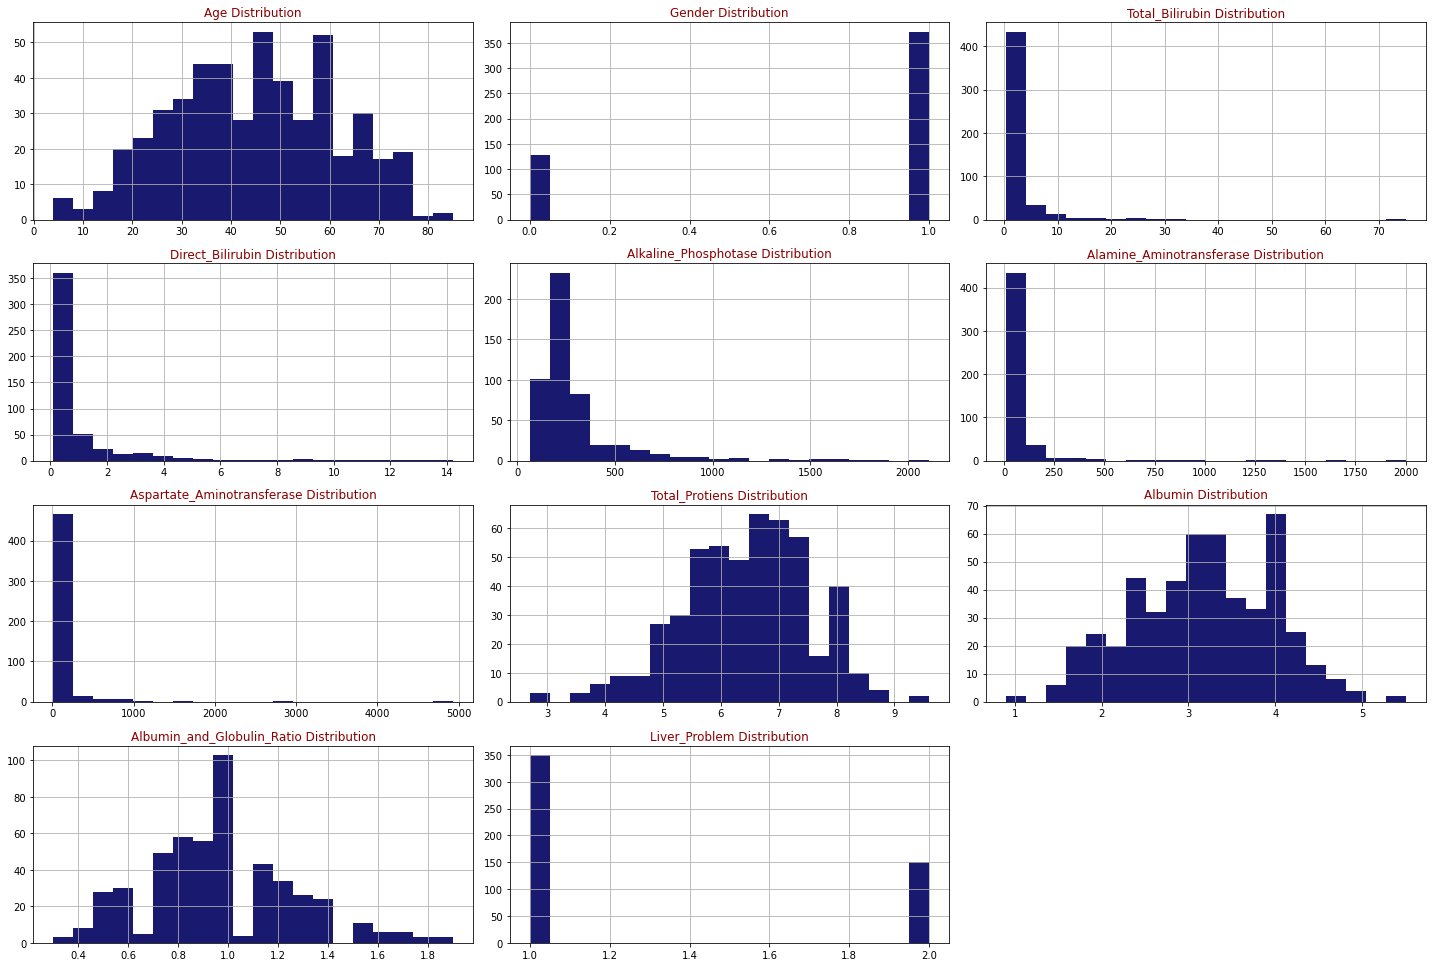

In [15]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(liver_data,liver_data.columns,6,3)

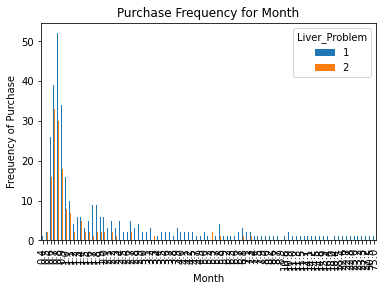

In [16]:
pd.crosstab(liver_data.Total_Bilirubin,liver_data.Liver_Problem).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

In [17]:
liver_data.Liver_Problem.value_counts()

1    350
2    150
Name: Liver_Problem, dtype: int64

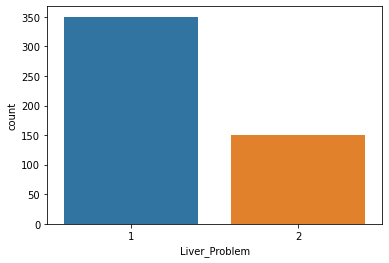

In [18]:
sn.countplot(x='Liver_Problem',data=liver_data)

In [19]:
liver_data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,44.5860,0.744000,2.603800,1.117200,296.372000,82.736000,108.820000,6.44480,3.168800,0.961220,1.300000
std,16.5334,0.436859,5.120238,2.066709,257.461676,194.366775,307.093557,1.08902,0.799741,0.293128,0.458717
min,4.0000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.70000,0.900000,0.300000,1.000000
25%,32.7500,0.000000,0.800000,0.200000,175.000000,23.000000,24.750000,5.70000,2.600000,0.800000,1.000000
50%,45.0000,1.000000,0.900000,0.300000,205.500000,33.500000,40.000000,6.50000,3.100000,1.000000,1.000000
75%,58.0000,1.000000,2.200000,1.000000,298.000000,59.250000,79.250000,7.20000,3.800000,1.100000,2.000000
max,85.0000,1.000000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.60000,5.500000,1.900000,2.000000


In [107]:
import sklearn
x = liver_data[['Age','Gender','Total_Bilirubin','Alamine_Aminotransferase','Total_Protiens','Albumin_and_Globulin_Ratio']]
y = liver_data['Liver_Problem']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=99)

In [108]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [109]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.784

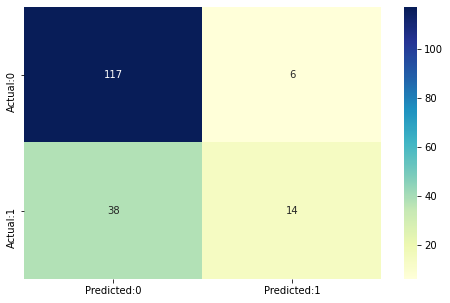

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [24]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [25]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7485714285714286 
 The Missclassification = 1-Accuracy =  0.25142857142857145 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.2692307692307692 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9512195121951219 
 Positive Predictive value = TP/(TP+FP) =  0.7 
 Negative predictive Value = TN/(TN+FN) =  0.7548387096774194 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  5.519230769230764 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.7682445759368838


In [26]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no Liver Problem (0)','Prob of Liver Probleme (1)'])
y_pred_prob_df.head()

,Prob of no Liver Problem (0),Prob of Liver Probleme (1)
0,0.662842,0.337158
1,0.655634,0.344366
2,0.602936,0.397064
3,0.674089,0.325911
4,0.823335,0.176665


In [27]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[ 0  0  0]
 [39 84  0]
 [ 3 49  0]] 
 with 84 correct predictions and 39 Type II errors( False Negatives) 

 Sensitivity:  0.6829268292682927 Specificity:  nan 



With 0.2 threshold the Confusion Matrix is  
 [[ 0  0  0]
 [52 71  0]
 [ 4 48  0]] 
 with 71 correct predictions and 52 Type II errors( False Negatives) 

 Sensitivity:  0.5772357723577236 Specificity:  nan 



With 0.3 threshold the Confusion Matrix is  
 [[ 0  0  0]
 [77 46  0]
 [10 42  0]] 
 with 46 correct predictions and 77 Type II errors( False Negatives) 

 Sensitivity:  0.37398373983739835 Specificity:  nan 



With 0.4 threshold the Confusion Matrix is  
 [[  0   0   0]
 [100  23   0]
 [ 24  28   0]] 
 with 23 correct predictions and 100 Type II errors( False Negatives) 

 Sensitivity:  0.18699186991869918 Specificity:  nan 





d:\python\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
d:\python\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
d:\python\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
d:\python\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
d:\python\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
d:\python\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in 

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [29]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7812695434646654

In [110]:
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1


In [111]:
test.Gender = [gender[val] for val in test.Gender] 
test.Gender.value_counts()

1    68
0    14
Name: Gender, dtype: int64

In [112]:
new_x = test_new[['Age','Gender','Total_Bilirubin','Alamine_Aminotransferase','Total_Protiens','Albumin_and_Globulin_Ratio']]
predictions=logreg.predict(new_x)

In [113]:
res = pd.DataFrame(predictions)
res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_HP2.csv") 